<a href="https://colab.research.google.com/github/ImenMasmoudiEm/CCKInternshipProject/blob/main/CCK_Project_Primary_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification: Primary work

##Connecting to drive & importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/All/Projects/Ing Internship/Data')

In [ ]:
import pandas as pd
data=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/final-dataset.xlsx")
data

,commentaire,classe
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,normal
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,hate
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,normal
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,hate
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,hate
...,...,...
23028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,hate
23029,وبلدك سوريا لا تبغي سوا القتل والاجرام,hate
23030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,normal
23031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,normal


##Data Preprocessing

1/ Changing the Class into bin

In [ ]:
data['classe']=data['classe'].replace("hate", int(2))
data['classe']=data['classe'].replace("normal", int(0)) 
data['classe']=data['classe'].replace("abusive", int(1))

In [ ]:
data

,commentaire,classe
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,0
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,2
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,0
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,2
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,2
...,...,...
23028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,2
23029,وبلدك سوريا لا تبغي سوا القتل والاجرام,2
23030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,0
23031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,0


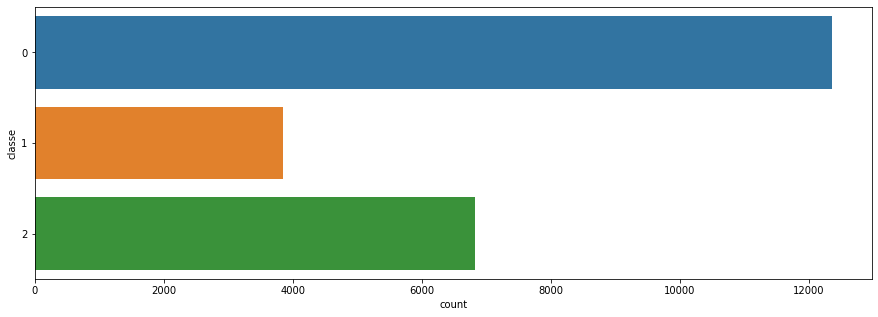

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data)
plt.show()

In [ ]:
print(data.loc[data.classe==0].groupby('classe')["classe"].count())
print(data.loc[data.classe==1].groupby('classe')["classe"].count())
print(data.loc[data.classe==2].groupby('classe')["classe"].count())

classe
0    12353
Name: classe, dtype: int64
classe
1    3850
Name: classe, dtype: int64
classe
2    6830
Name: classe, dtype: int64


2/ NLP Data Preparations: Data Balancing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

sentences = []
labels = []

sentences = data['commentaire']
labels = data['classe']
L=[]
#for i in labels:
#  if (i != '1') and (i != '0'):
#    L.append(i)

labels = [int(i) for i in labels]
#L

In [ ]:
i=0
c=0
Nlables=[]
Nsentences=[]
while (c<6000):
  if (labels[i]!= 0):
    Nlables.append(labels[i])
    Nsentences.append(sentences[i])
  else:
    c+=1
  i+=1
while (i<len(labels)):
  Nlables.append(labels[i])
  Nsentences.append(sentences[i])
  i+=1


In [ ]:
import pandas as pd

data=[[i,j] for i,j in zip(Nsentences , Nlables)]

data=pd.DataFrame(data,columns=["sentences","classe"])

data

,sentences,classe
0,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,2
1,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,2
2,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,2
3,أنت أزاي لبؤة كدة ؟,1
4,دول عبيد باسم !! انت ما تعرفش غير ستات كده يعن...,2
...,...,...
17028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,2
17029,وبلدك سوريا لا تبغي سوا القتل والاجرام,2
17030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,0
17031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,0


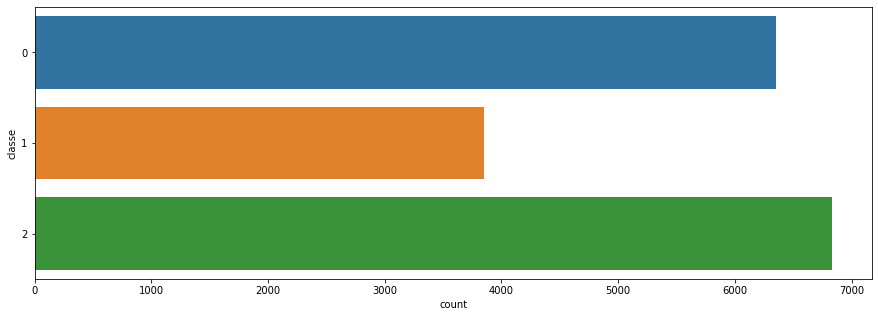

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data)
plt.show()

In [ ]:
#Figure out the longest comment

def count_words(input):
  return len(input.split())
max_length=count_words(max(Nsentences,key=count_words))
max_length

207

#Importing extra data

In [ ]:
data12=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/dataset1and2.xlsx")
data34=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/dataset3and4.xlsx")

data12['classe']=data12['classe'].replace("hate", int(2))
data12['classe']=data12['classe'].replace("normal", int(0)) 
data12['classe']=data12['classe'].replace("abusive", int(1))

data34['classe']=data34['classe'].replace("hate", int(2))
data34['classe']=data34['classe'].replace("normal", int(0)) 
data34['classe']=data34['classe'].replace("abusive", int(1))


C1=data12["commentaire"]
C2=data34["commentaire"]
L1=data12["classe"]
L2=data34["classe"]


data12=[[i,j] for i,j in zip(C1 , L1)]
data34=[[i,j] for i,j in zip(C2 , L2)]

data12=pd.DataFrame(data12,columns=["sentences","classe"])
data34=pd.DataFrame(data34,columns=["sentences","classe"])

In [ ]:
data12

,sentences,classe
0,اسغي ياشعب تونس تدعوا بالاسلام كفار الحمدلله ن...,2
1,قطع يد السارق توفرت الشروط شرط الحد الأدنى قيم...,0
2,تلوموش لطفي لعبدلي شرف,0
3,مستغرب شعب يسمع تفاهة شانو لى الدرجة الشعب تاف...,0
4,هههخ غزلتني مافهمتش شمدخلها الموضوع تتنطر وحده...,0
...,...,...
6455,وجهو وجه الطحين ورخس,1
6456,الله لا يبارك فيكم و في الي تزرعوا فيه اليوم ل...,2
6457,ملا حثالة مستدعيه ، قواد ولحاس ، طيح مستوى الب...,2
6458,شبعة خمج.اينما يقيم الجهل,2


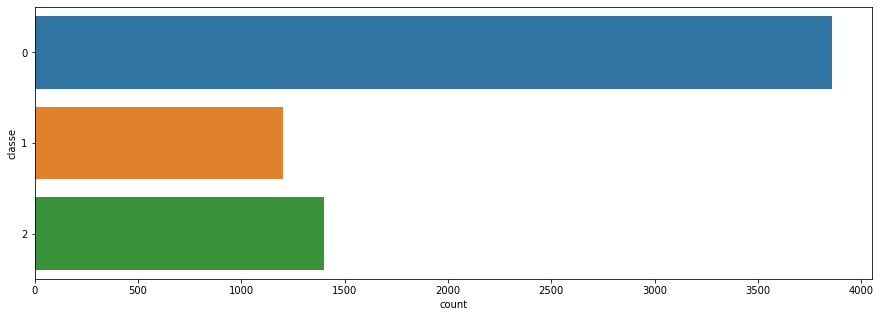

classe
0    3857
Name: classe, dtype: int64
classe
1    1204
Name: classe, dtype: int64
classe
2    1399
Name: classe, dtype: int64


In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data12)
plt.show()
print(data12.loc[data12.classe==0].groupby('classe')["classe"].count())
print(data12.loc[data12.classe==1].groupby('classe')["classe"].count())
print(data12.loc[data12.classe==2].groupby('classe')["classe"].count())

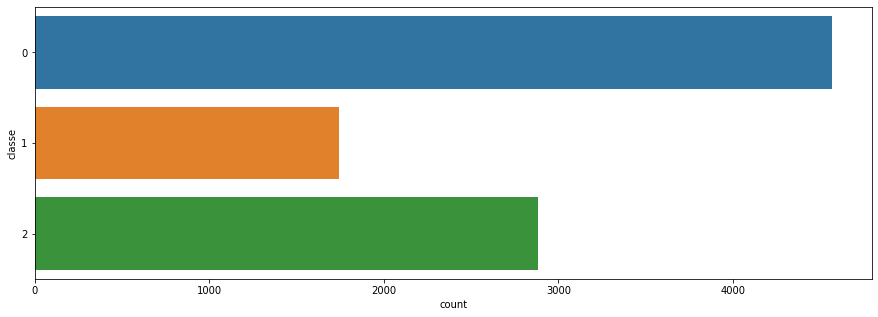

classe
0    4565
Name: classe, dtype: int64
classe
1    1746
Name: classe, dtype: int64
classe
2    2885
Name: classe, dtype: int64


In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data34)
plt.show()
print(data34.loc[data34.classe==0].groupby('classe')["classe"].count())
print(data34.loc[data34.classe==1].groupby('classe')["classe"].count())
print(data34.loc[data34.classe==2].groupby('classe')["classe"].count())

##The way that the computers percieve words and phrases is diffrent from the way that we preceve it as human beings. There are a veriety of ways for us that we can utilise to program the data type that we have and to make it numerical so that the model can get some meaning out of it. We call this part encoding text.
##we can transfor each alphabet and caracter to it's ASCII Code, but this approach wasn't proven to give great results [To Research] !!!
#What I did in the code was: Continus or distributed Embeddings Vectors representation:
* First: Build a dictionary of tokens: I defined a dictionnary That has the words as keys and a unique number as a value
* I then changed all of the phrases into Lists that has integers that indicate which word is in that particular place
* Use One-Hot Vector

##After doing this process, we have a numerical data that the model can use to get some meaning out of the labels

In [ ]:
training_size=int(len(Nsentences)*0.8)   #Experimenting setup

training_sentences = Nsentences[0:training_size]
testing_sentences = Nsentences[training_size:]
training_labels = Nlables[0:training_size]
testing_labels = Nlables[training_size:]

embedding_dim = 16

tokenizer = Tokenizer(num_words=3000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

vocab_size = len(tokenizer.word_index) + 1 

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
vocab_size

37785

In [ ]:
len(word_index)

37784

In [ ]:
help(tokenizer)

Help on Tokenizer in module keras_preprocessing.text object:

class Tokenizer(builtins.object)
 |  Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0, **kwargs)
 |  
 |  Text tokenization utility class.
 |  
 |  This class allows to vectorize a text corpus, by turning each
 |  text into either a sequence of integers (each integer being the index
 |  of a token in a dictionary) or into a vector where the coefficient
 |  for each token could be binary, based on word count, based on tf-idf...
 |  
 |  # Arguments
 |      num_words: the maximum number of words to keep, based
 |          on word frequency. Only the most common `num_words-1` words will
 |          be kept.
 |      filters: a string where each element is a character that will be
 |          filtered from the texts. The default is all punctuation, plus
 |          tabs and line breaks, minus the `'` character.
 |      lower: boolea

In [ ]:
Nsentences12=data12["sentences"]

training_size=int(len(Nsentences12)*0.8)

testing_sentences12 = Nsentences[training_size:]
testing_labels12 = Nlables[training_size:]

Nsentences34=data34["sentences"]

training_size=int(len(Nsentences34)*0.8)

testing_sentences34 = Nsentences[training_size:]
testing_labels34 = Nlables[training_size:]

In [ ]:
max_length12=count_words(max(testing_sentences12,key=count_words))
max_length12

75

In [ ]:
max_length34=count_words(max(testing_sentences34,key=count_words))
max_length34

63

###The Maximum length in the new data is less than 207, so we can padd them without losing information.

In [ ]:
testing_sequences12 = tokenizer.texts_to_sequences(testing_sentences12)
testing_padded12 = pad_sequences(testing_sequences12, maxlen=max_length, padding='post', truncating='post')

testing_sequences34 = tokenizer.texts_to_sequences(testing_sentences34)
testing_padded34 = pad_sequences(testing_sequences34, maxlen=max_length, padding='post', truncating='post')

#Modelling

##For The First Model

In [ ]:
import tensorflow as tf

model=tf.keras.models.Sequential ([
                                   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                   tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                   tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(units=3, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 209, 16)           604560    
                                                                 
 conv1d (Conv1D)             (None, 205, 128)          10368     
                                                                 
 conv1d_1 (Conv1D)           (None, 205, 32)           4128      
                                                                 
 bidirectional (Bidirectiona  (None, 205, 64)          16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 205, 64)          24832     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 205, 32)          1

In [ ]:
#For the First Model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'],run_eagerly=True)

training_padded = np.asarray(training_padded).astype(np.int)
training_labels = np.asarray(training_labels).astype(np.int)
testing_padded = np.asarray(testing_padded).astype(np.int)
testing_labels = np.asarray(testing_labels).astype(np.int)

#training_padded = np.expand_dims(training_padded, axis=1)
training_labels = np.expand_dims(training_labels, axis=1)
#testing_padded = np.expand_dims(testing_padded, axis=1)
testing_labels = np.expand_dims(testing_labels, axis=1)

history = model.fit(training_padded, training_labels, batch_size=128, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

107/107 [==============================] - 23s 109ms/step - loss: 0.9601 - accuracy: 0.5182 - val_loss: 1.0360 - val_accuracy: 0.5389
Epoch 2/50
107/107 [==============================] - 11s 105ms/step - loss: 0.6427 - accuracy: 0.7285 - val_loss: 0.7327 - val_accuracy: 0.6965
Epoch 3/50
107/107 [==============================] - 11s 107ms/step - loss: 0.4886 - accuracy: 0.8068 - val_loss: 0.7090 - val_accuracy: 0.7385
Epoch 4/50
107/107 [==============================] - 11s 106ms/step - loss: 0.4362 - accuracy: 0.8292 - val_loss: 0.8020 - val_accuracy: 0.7338
Epoch 5/50
107/107 [==============================] - 11s 108ms/step - loss: 0.3960 - accuracy: 0.8444 - val_loss: 0.7789 - val_accuracy: 0.7514
Epoch 6/50
107/107 [==============================] - 12s 108ms/step - loss: 0.3719 - accuracy: 0.8562 - val_loss: 0.7014 - val_accuracy: 0.7749
Epoch 7/50
107/107 [==============================] - 12s 108ms/step - loss: 0.3424 - accuracy: 0.8661 - val_loss: 0.8043 - val_accuracy: 0.7

In [ ]:
#Epoch 20/20
#144/144 [==============================] - 245s 2s/step - loss: 0.1099 - accuracy: 0.9551 - val_loss: 0.2792 - val_accuracy: 0.9184
#Epoch 15/15
#107/107 [==============================] - 12s 108ms/step - loss: 0.2000 - accuracy: 0.9226 - val_loss: 0.8032 - val_accuracy: 0.7934
#Epoch 50/50
#107/107 [==============================] - 12s 109ms/step - loss: 0.1048 - accuracy: 0.9466 - val_loss: 1.1665 - val_accuracy: 0.8201
#Epoch 50/50
#107/107 [==============================] - 12s 108ms/step - loss: 0.0983 - accuracy: 0.9478 - val_loss: 1.3881 - val_accuracy: 0.8045

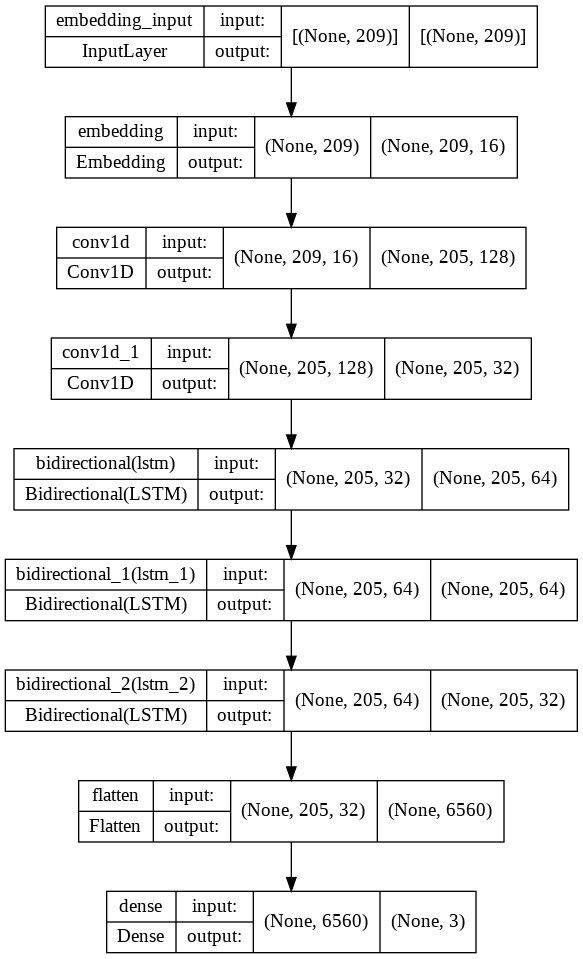

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
pred=model.predict(testing_padded)
rounded_labels1=np.argmax(pred, axis=1).astype(int)
cm = confusion_matrix(testing_labels, rounded_labels1)
print(cm)

array([[1486,  159,  329],
       [  10,  508,   54],
       [  43,   71,  747]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(testing_labels, rounded_labels1, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      1974
           1       0.69      0.89      0.78       572
           2       0.66      0.87      0.75       861

    accuracy                           0.80      3407
   macro avg       0.77      0.84      0.79      3407
weighted avg       0.84      0.80      0.81      3407



In [ ]:
pred12=model.predict(testing_padded12)
rounded_labels112=np.argmax(pred12, axis=1).astype(int)
cm12 = confusion_matrix(testing_labels12, rounded_labels112)
print(cm12)
print(classification_report(testing_labels12, rounded_labels112, labels=[0,1,2]))

In [ ]:
pred34=model.predict(testing_padded34)
rounded_labels134=np.argmax(pred34, axis=1).astype(int)
cm34 = confusion_matrix(testing_labels34, rounded_labels134)
print(cm34)
print(classification_report(testing_labels34, rounded_labels134, labels=[0,1,2]))

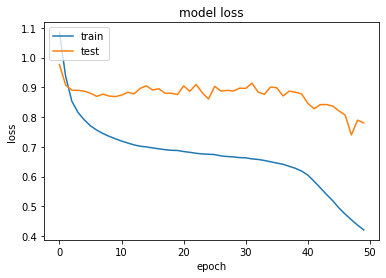

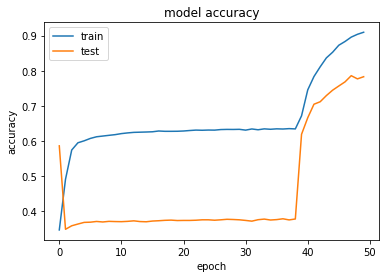

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##For the Second Model

In [ ]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 209, 16)           604560    
                                                                 
 conv1d_4 (Conv1D)           (None, 205, 128)          10368     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 24)                3096      
                                                                 
 dense_8 (Dense)             (None, 2)                 50        
                                                      

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])


history = model2.fit(training_padded, training_labels, batch_size=128, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
107/107 [==============================] - 1s 9ms/step - loss: 1.0533 - accuracy: 0.3793 - val_loss: 0.9763 - val_accuracy: 0.5178
Epoch 2/50
107/107 [==============================] - 1s 7ms/step - loss: 0.9104 - accuracy: 0.5513 - val_loss: 0.9035 - val_accuracy: 0.3466
Epoch 3/50
107/107 [==============================] - 1s 7ms/step - loss: 0.8469 - accuracy: 0.5629 - val_loss: 0.8983 - val_accuracy: 0.3516
Epoch 4/50
107/107 [==============================] - 1s 7ms/step - loss: 0.8139 - accuracy: 0.5787 - val_loss: 0.9334 - val_accuracy: 0.3446
Epoch 5/50
107/107 [==============================] - 1s 7ms/step - loss: 0.7890 - accuracy: 0.5906 - val_loss: 0.8781 - val_accuracy: 0.3622
Epoch 6/50
107/107 [==============================] - 1s 6ms/step - loss: 0.7695 - accuracy: 0.5957 - val_loss: 0.8952 - val_accuracy: 0.3610
Epoch 7/50
107/107 [==============================] - 1s 6ms/step - loss: 0.7547 - accuracy: 0.6016 - val_loss: 0.8948 - val_accuracy: 0.3616
Epoch 

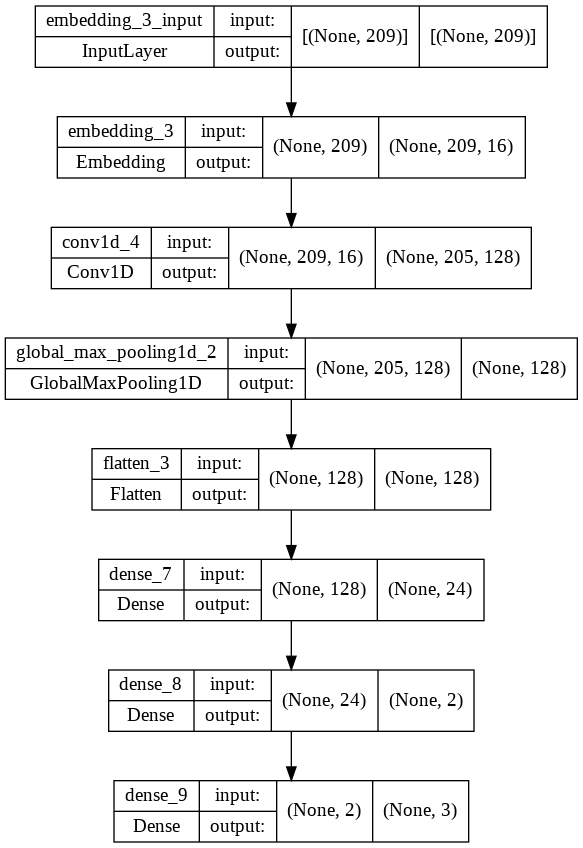

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
pred1=model2.predict(testing_padded)

pred11=[]
for i in pred1:
  if i[0]==max(i):
    pred11.append(0)
  elif i[1]==max(i):
    pred11.append(1)
  else:
    pred11.append(2)
#rounded_labels11=np.argmax(pred11, axis=1).astype(int)
cm = confusion_matrix(testing_labels, pred11)
cm

array([[1490,  122,  362],
       [  14,  502,   56],
       [  82,   75,  704]])

In [ ]:
#Epoch 50/50
#107/107 [==============================] - 1s 6ms/step - loss: 0.4205 - accuracy: 0.9095 - val_loss: 0.7803 - val_accuracy: 0.7828
#Epoch 50/50
#107/107 [==============================] - 1s 6ms/step - loss: 0.3440 - accuracy: 0.9345 - val_loss: 0.7823 - val_accuracy: 0.7913

In [ ]:
print(classification_report(testing_labels, pred11, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84      1974
           1       0.72      0.88      0.79       572
           2       0.63      0.82      0.71       861

    accuracy                           0.79      3407
   macro avg       0.76      0.82      0.78      3407
weighted avg       0.82      0.79      0.80      3407



In [ ]:
pred12=model2.predict(testing_padded12)
rounded_labels212=np.argmax(pred12, axis=1).astype(int)
cm12 = confusion_matrix(testing_labels12, rounded_labels212)
print(cm12)
print(classification_report(testing_labels12, rounded_labels212, labels=[0,1,2]))

In [ ]:
pred34=model2.predict(testing_padded34)
rounded_labels234=np.argmax(pred34, axis=1).astype(int)
cm34 = confusion_matrix(testing_labels34, rounded_labels234)
print(cm34)
print(classification_report(testing_labels34, rounded_labels234, labels=[0,1,2]))

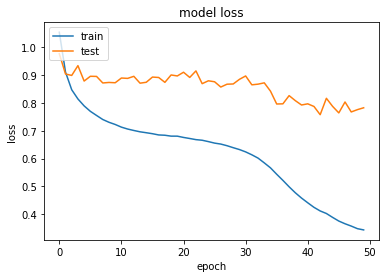

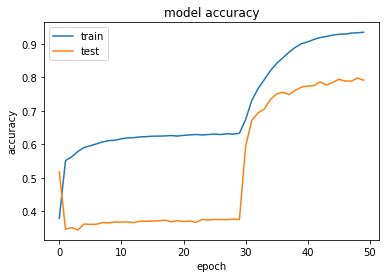

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##For The Third Model

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 209, 16)           604560    
                                                                 
 bidirectional_8 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 24)                1560      
                                                                 
 dense_21 (Dense)            (None, 3)                 75        
                                                                 
Total params: 618,739
Trainable params: 618,739
Non-trainable params: 0
________________________________________________

In [ ]:
model3.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history = model3.fit(training_padded, training_labels, batch_size=128, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
107/107 [==============================] - 5s 26ms/step - loss: 0.9948 - accuracy: 0.4992 - val_loss: 0.8784 - val_accuracy: 0.5609
Epoch 2/50
107/107 [==============================] - 2s 18ms/step - loss: 0.6676 - accuracy: 0.7108 - val_loss: 0.8608 - val_accuracy: 0.6810
Epoch 3/50
107/107 [==============================] - 2s 18ms/step - loss: 0.5010 - accuracy: 0.8027 - val_loss: 0.8317 - val_accuracy: 0.6986
Epoch 4/50
107/107 [==============================] - 2s 18ms/step - loss: 0.4425 - accuracy: 0.8256 - val_loss: 0.8548 - val_accuracy: 0.7209
Epoch 5/50
107/107 [==============================] - 2s 18ms/step - loss: 0.4096 - accuracy: 0.8384 - val_loss: 0.7444 - val_accuracy: 0.7473
Epoch 6/50
107/107 [==============================] - 2s 18ms/step - loss: 0.3927 - accuracy: 0.8437 - val_loss: 0.8853 - val_accuracy: 0.7259
Epoch 7/50
107/107 [==============================] - 2s 18ms/step - loss: 0.3772 - accuracy: 0.8515 - val_loss: 0.8209 - val_accuracy: 0.7479

In [ ]:
#Epoch 50/50
#107/107 [==============================] - 2s 18ms/step - loss: 0.1754 - accuracy: 0.9260 - val_loss: 1.2077 - val_accuracy: 0.7878
#Epoch 50/50
#107/107 [==============================] - 2s 21ms/step - loss: 0.1698 - accuracy: 0.9259 - val_loss: 1.0955 - val_accuracy: 0.7940

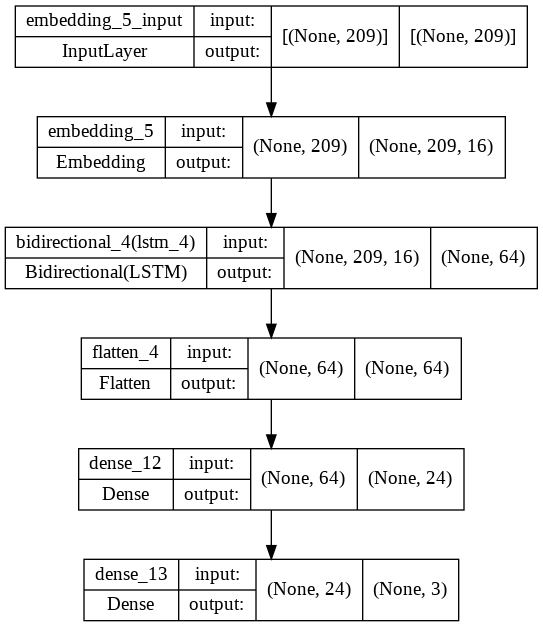

In [ ]:
tf.keras.utils.plot_model(model3, show_shapes=True)

In [ ]:
pred3=model3.predict(testing_padded)
rounded_labels3=np.argmax(pred3, axis=1).astype(int)
cm2 = confusion_matrix(testing_labels, rounded_labels3)
cm2

array([[1497,  138,  339],
       [  31,  484,   57],
       [  76,   61,  724]])

In [ ]:
print(classification_report(testing_labels, rounded_labels3, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1974
           1       0.71      0.85      0.77       572
           2       0.65      0.84      0.73       861

    accuracy                           0.79      3407
   macro avg       0.76      0.82      0.78      3407
weighted avg       0.82      0.79      0.80      3407



In [ ]:
pred12=model3.predict(testing_padded12)
rounded_labels312=np.argmax(pred12, axis=1).astype(int)
cm12 = confusion_matrix(testing_labels12, rounded_labels312)
print(cm12)
print(classification_report(testing_labels12, rounded_labels312, labels=[0,1,2]))

In [ ]:
pred34=model3.predict(testing_padded34)
rounded_labels334=np.argmax(pred34, axis=1).astype(int)
cm34 = confusion_matrix(testing_labels34, rounded_labels334)
print(cm34)
print(classification_report(testing_labels34, rounded_labels334, labels=[0,1,2]))

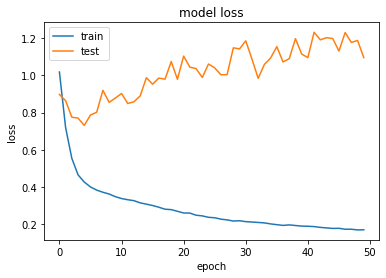

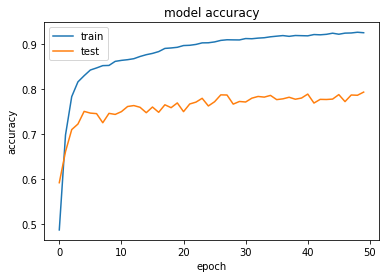

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

##Conclusion
###The accuracy for the three models is 58% yet the complexity varies. The first model has 690 579 trainale parameters which makes it the most complex amongs the three of them with the second having 618 083 trainable parameters and the third having 618 739 trainable parameters.
###After giving the problem a first look, we can suspect that:
* This is a deep Learning Problem where we need more data and a bigger model so we can track the pattern and better the model's accuracy
* Te model is not getting the pattern in the data well so this can be due to some data imbalence 
* We need to further explore our data and to create a bigger model

#Terms
##BURT: is a transformar model
##Sentiment Classification: A prabability distrubution over two classes
##Text Encoding: How to encode the texts into a numerical presentation that we can be handled by the machine learning model
##Transformers: The State-Of-The-Art architecture for language modeling
#Word2vec: 2013, The Model that introduced distributed representations for language modeling